In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

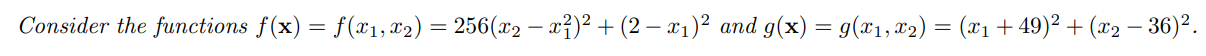

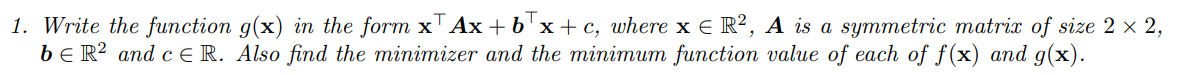

We know g(x) quadratic function where:

$g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2 = x_1^2 + x_2^2 + 98x_1 - 72x_2 + 49^2 + 36^2$

$g(\mathbf{x}) = \mathbf{x}^T\begin{bmatrix}1 \ \ 0\\ 0 \ \  1\end{bmatrix}\mathbf{x} + \begin{bmatrix}98 \ \ -72\end{bmatrix}\mathbf{x} + 3697$

where $\mathbf{x} = \begin{bmatrix} x_1  \\ x_2 \end{bmatrix}$ and A is the identity matrix, while b is given above.



For $f(x_1, x_2) = 256(x_2-x_1^2)^2 + (2-x_1)^2$ we see that function is always positive, hence minimum if possible will be 0. We see that for $x_1 =2$ second term goes to 0 and for first term $x_2 = 4$ will result in whole function value to be 0. Hence, the minimizer will be $(2,4)$.

For $g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2$, we can easily see that $(-49, 36)$ is the minimizer and objective value is 0. No need to find gradients and all because, function is always positive, and we achieve the lowest possible value which is 0.

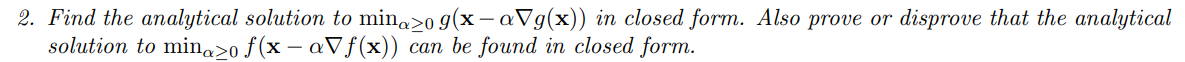

Analytical solution to
$
arg\,min_{\alpha \geq 0} \quad g(x-\alpha \nabla g(x))
$

Note that $\nabla g(x)=\left\langle 2\left(x_1+49\right), 2\left(x_2-36\right)\right\rangle$
$
\Rightarrow x-\alpha \nabla g(x)=\left\langle x_1-2 \alpha\left(x_1+49\right), x_2-2 \alpha\left(x_2-36\right)\right\rangle
$
$\Rightarrow g(x-\alpha \nabla g(x))=\left(x_1-2 \alpha\left(x_1+49\right)+49\right)^2 +\left(x_2-2 \alpha\left(x_2-36\right)-36\right)^2 \\
= \quad\left(x_1+49\right)^2(1-2 \alpha)^2+\left(x_2-36\right)^2(1-2 \alpha)^2
$

Assuming $\quad \gamma(\alpha)=g(x-\alpha \nabla g(x))$

Minimizing $\gamma(\alpha)$ will result in $\operatorname{argmin}_{\alpha \geqslant 0} g(x-\alpha \nabla g(x))$

We notice that $\gamma(\alpha)$ again is an always positive function hence,
Minimum can be achieved if $\alpha = 0.5$, for which $\gamma(\alpha)=0$ which is lowest possible.
Therefore, $\alpha = 0.5$ is the exact line search coefficient which is in closed form.

$$
\min _{\alpha \geqslant 0} f(x-\alpha \nabla f(x)) .
$$

Note that,
$$
\nabla f=\left\langle 1024 x_1\left(x_1^2-x_2\right)+2 x_1-4,-512 x_1^2+512 x_2\right\rangle
$$

Therefore
$$
\begin{aligned}
& \underset{\alpha>0}{\operatorname{argmin}} f(x-\alpha \nabla f) \\
& =f\left(x_1-\alpha\left(1024 x_1\left(x_1^2-x_2\right)+2 x_1-4\right),\quad x_2-\alpha\left(512 x_2-512 x_1^2\right)\right)
\end{aligned}
$$

This is a quartic function in $\alpha$ and will not have a unique sol ${ }^n$ for $\operatorname{argmin}_{\alpha \geqslant 0}$.
Closed form solution might exist but definitely not unique and easy.

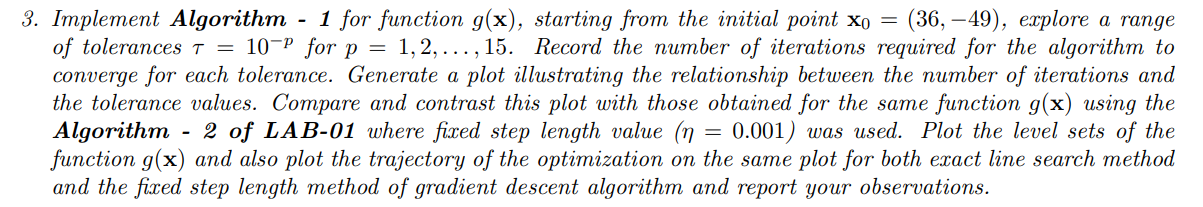

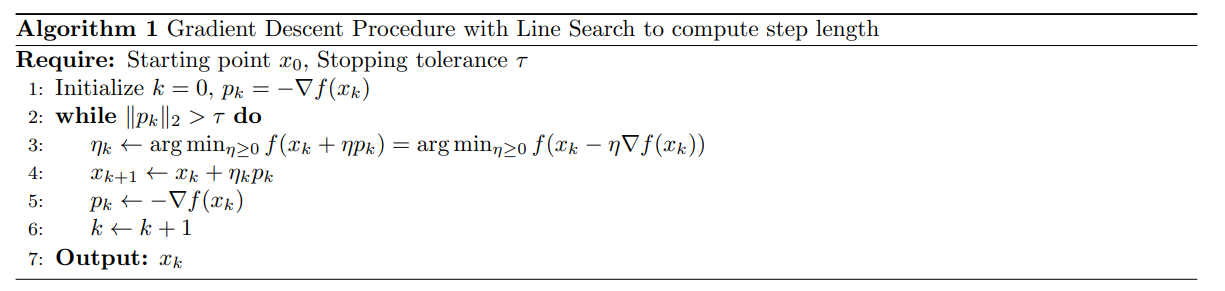

Algo 2 of Lab 1

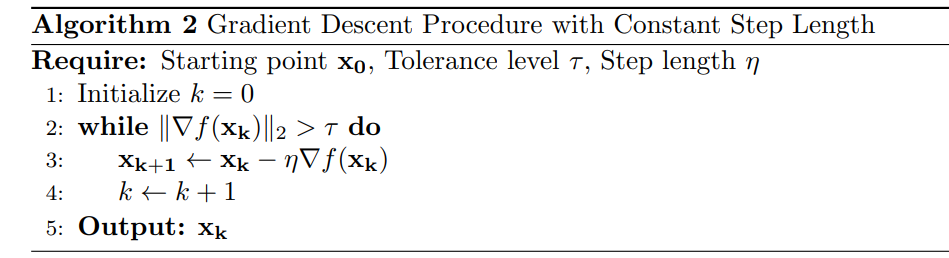

First we plot for Algorithm 1 of Lab 2

<Axes: >

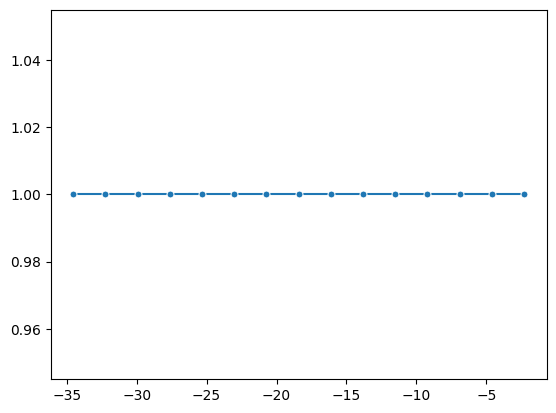

In [ ]:
taus = [10**(-p) for p in range(1, 16)]
x0 = np.array([36,-49])

def gradg(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-2*(x1+49), -2*(x2-36)])

def gx(x1,x2):
  return (x1 + 49)**2 + (x2-36)**2

iterations = []
for tau in taus:
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)

  while norm(pk)>tau:
    eeta = 0.5    # closed form solution of step length from part 2
    xk = xk + eeta*pk
    pk = gradg(xk)
    count += 1

  iterations.append(count)

sns.lineplot(x= np.log10(taus),y=  iterations, marker= 'o', markersize = 5)

Now we plot the the tau values against iteration for Algorithm 2 of Lab 2

<Axes: >

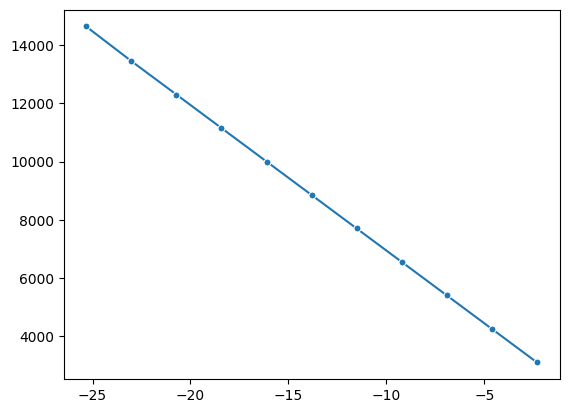

In [ ]:
alpha = 0.001
x0 = np.array([-30,20])

taus = [10**(-p) for p in range(1,12)]

iterationstore = []

for tau in taus:
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)

  while norm(pk) > tau:
    xk = xk + alpha*pk
    pk = gradg(xk)
    count += 1

  iterationstore.append(count)

sns.lineplot(x= np.log10(taus),y=  iterationstore, marker= 'o', markersize = 5)

Comparing and observing the above two plots, we see that for Algorithm 1 with exact line search we solve all of them in one step only. But for Algorithm 2 with constant step size the iteration count increases with decrease in tolerance level. This is because as the tolerence decrease we need more steps to decrease the gradient to 0 which will result in more steps to take.

### Plotting the level curves for both

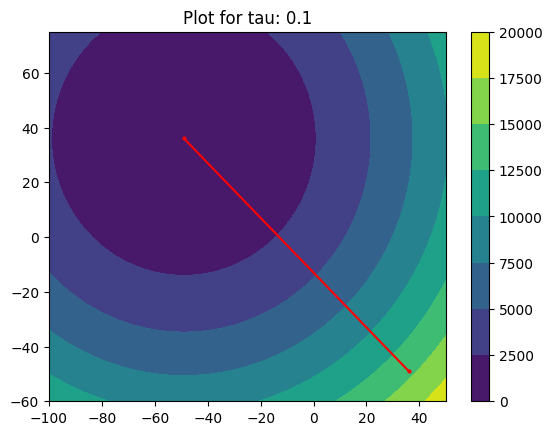

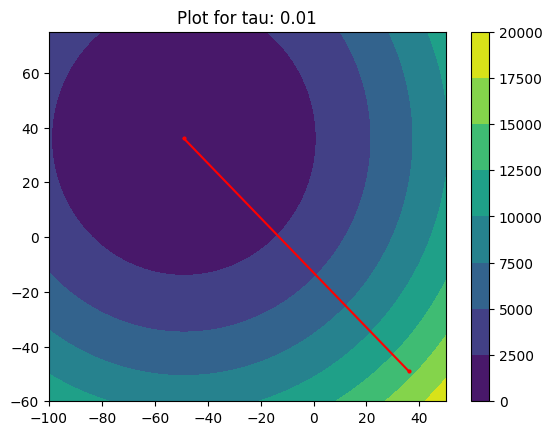

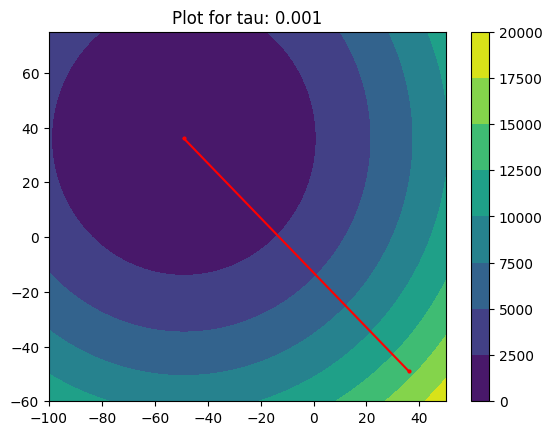

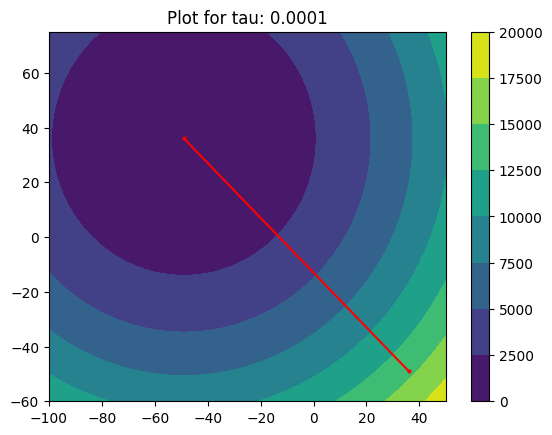

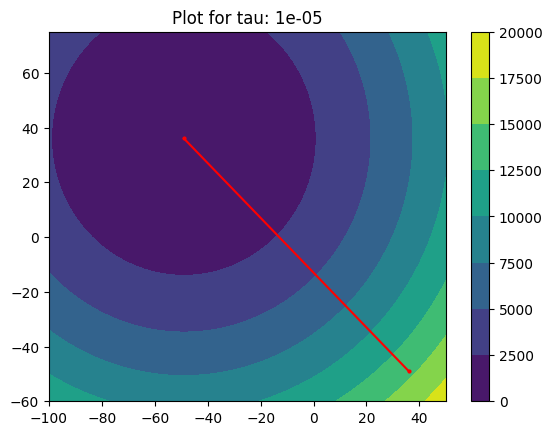

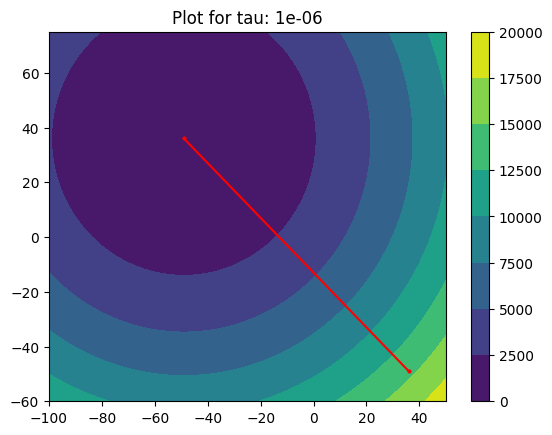

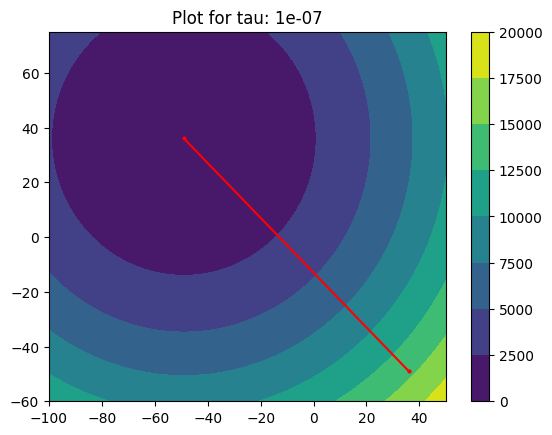

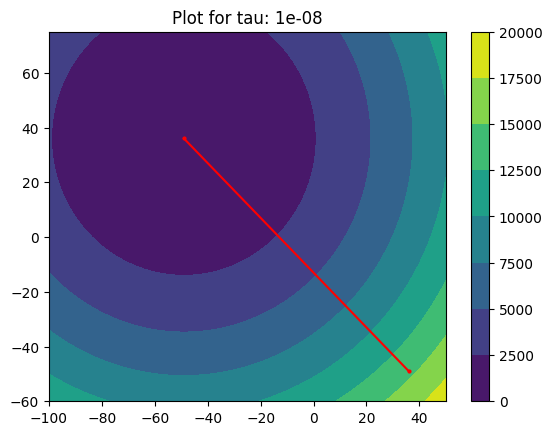

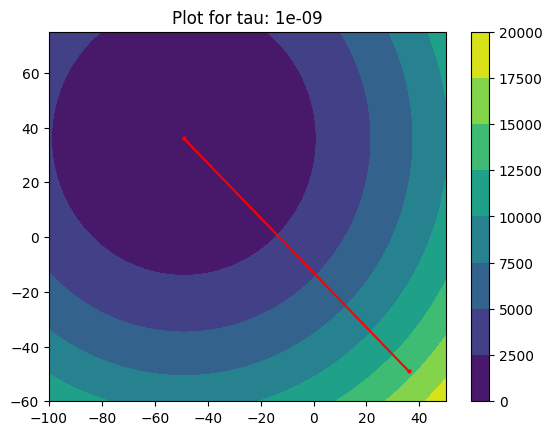

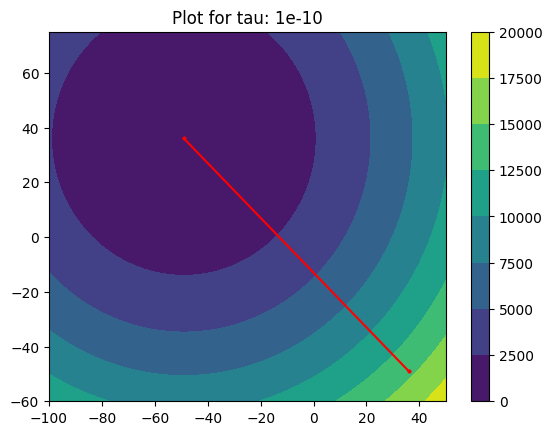

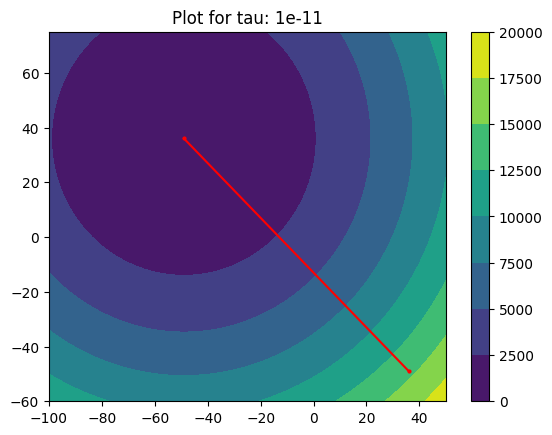

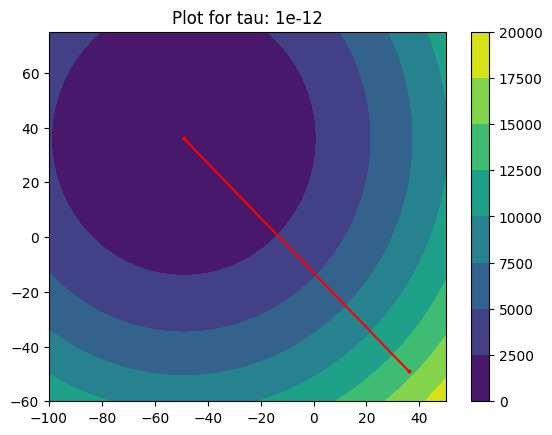

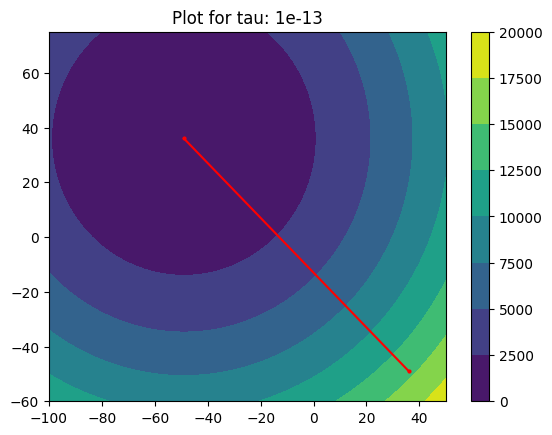

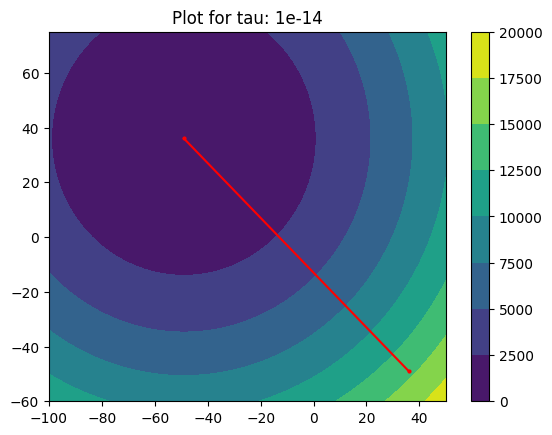

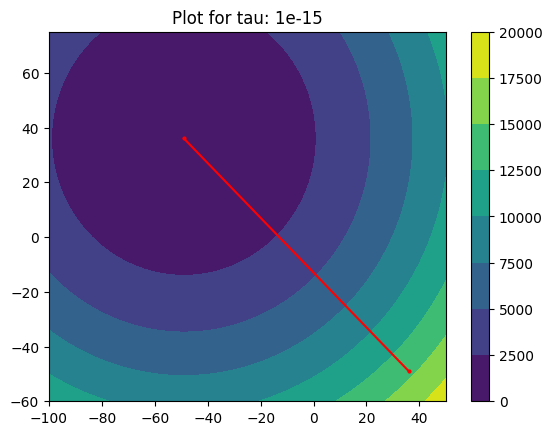

In [ ]:
taus = [10**(-p) for p in range(1, 16)]
x0 = np.array([36,-49])

def gradg(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-2*(x1+49), -2*(x2-36)])

def gx(x1,x2):
  return (x1 + 49)**2 + (x2-36)**2

iterations = []
for tau in taus:
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)


  x = np.linspace(-100, 50, 1000)
  y = np.linspace(-60, 75, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx(X,Y)
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)


  xcordinates = []
  ycordinates = []
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])

  while norm(pk)>tau:
    eeta = 0.5    # closed form solution of step length from part 2
    xk = xk + eeta*pk
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
    pk = gradg(xk)
    count += 1

  plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2)
  plt.title("Plot for tau: "+str(tau))
  plt.show()
  iterations.append(count)

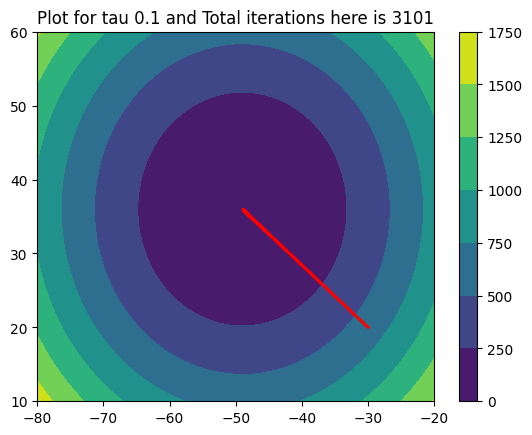

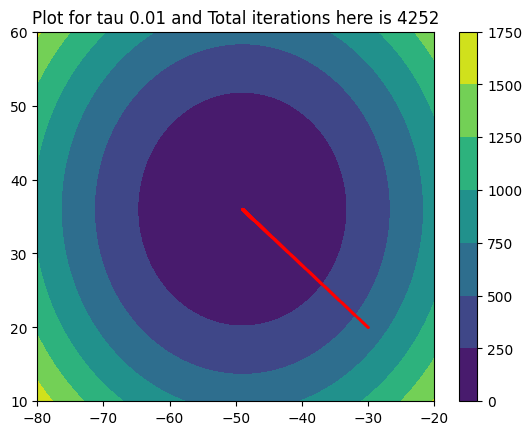

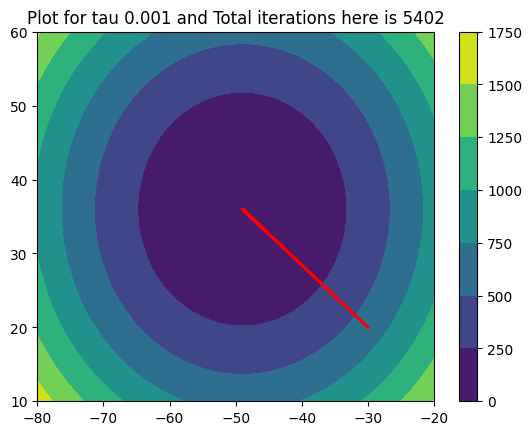

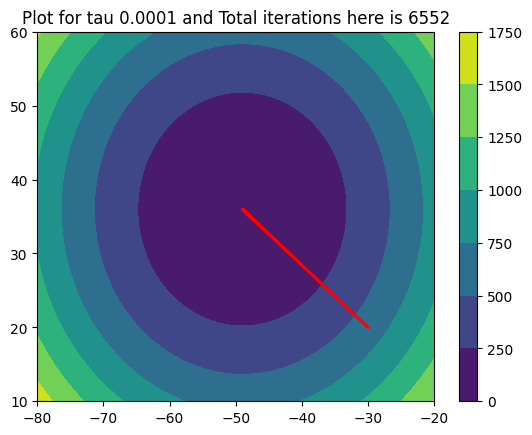

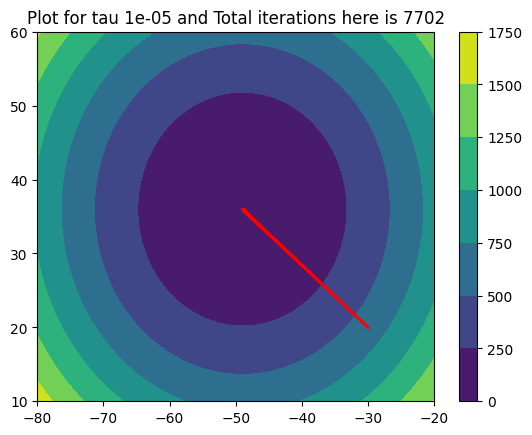

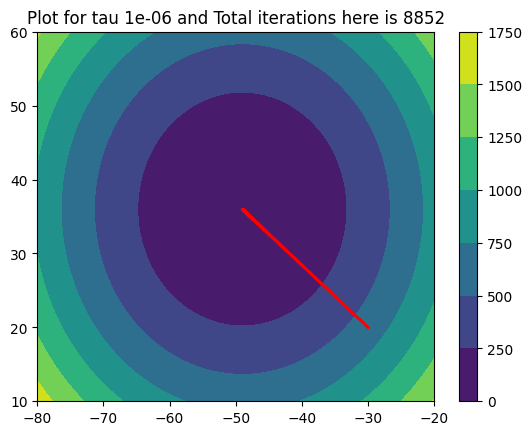

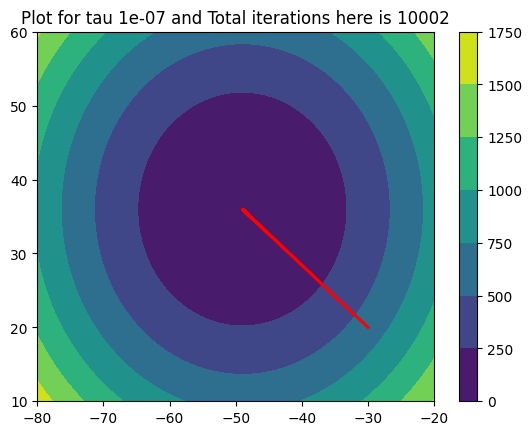

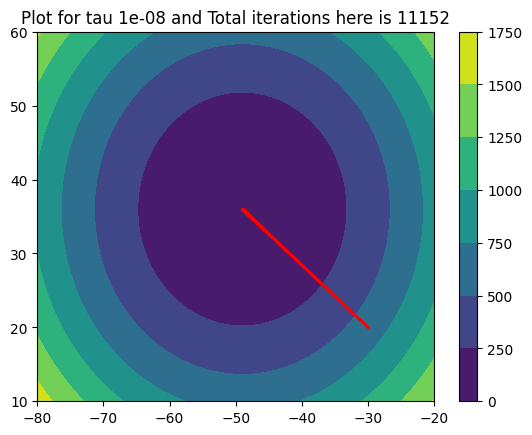

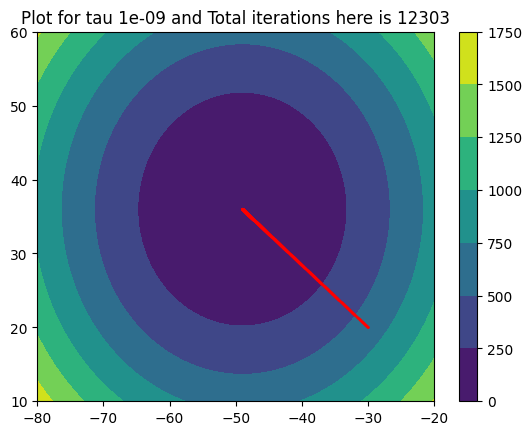

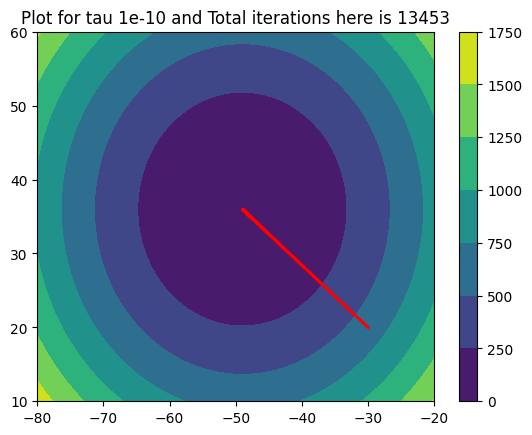

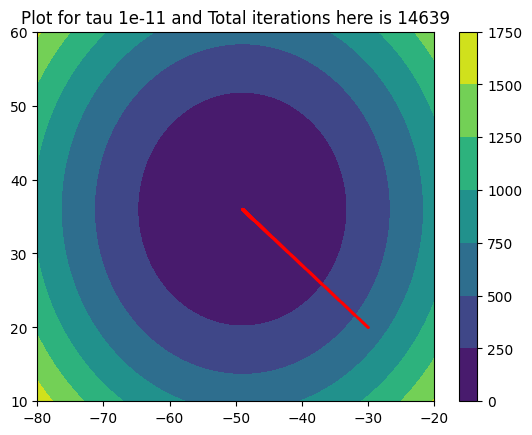

In [ ]:
alpha = 0.001
x0 = np.array([-30,20])

taus = [10**(-p) for p in range(1,12)]



minimizerstore = []
minimumstore = []
iterationstore = []

for tau in taus:
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)

  x = np.linspace(-80, -20, 1000)
  y = np.linspace(10, 60, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx(X,Y)
  p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)


  xcordinates = []
  ycordinates = []
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])
  while norm(pk) > tau:
    xk = xk + alpha*pk
    pk = gradg(xk)
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])

  plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 0.5)
  plt.title(f"Plot for tau {str(tau)} and Total iterations here is {count}")
  plt.show()


  minimizerstore.append(xk)
  minimumstore.append(gx(xk[0], xk[1]))
  iterationstore.append(count)

Seeing the above plots, we first observe that iteration taking keep on increasing as we decrese tau, although we take very small step in Algorithm 2 which is of 0.001, we keep on moving in the direction of minimizer. Second thing to observe is the Algorithm 2 of Lab 1 is not working for p values of (12,13,14,15), while Algorithm 1 of this lab works for all p values as only one step is needed to optimize to directly move towards the minimizer.

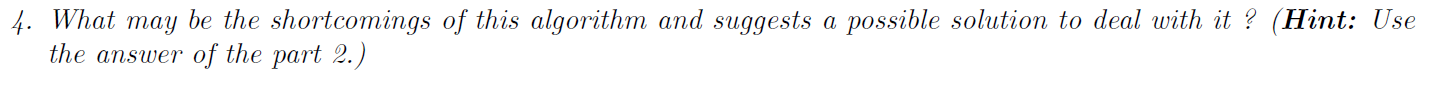

Exact line search in gradient descent involves finding the step size or learning rate that minimizes the objective function along the search direction. While it may seem ideal, there are some shortcomings associated with exact line search:

1. Exact line search requires evaluating the objective function at multiple points along the search direction to find the optimal step size. This can be computationally expensive, especially in high-dimensional optimization problems where each function evaluation involves a substantial amount of computation. In many cases, finding the exact minimum step size may not be necessary for convergence. A fixed or adaptive learning rate might be sufficient for achieving convergence, especially when dealing with convex and well-behaved objective functions. Computational Overhead: In some situations, the benefit gained from the precision of an exact line search might not justify the additional computational overhead. Approximate line search methods, such as backtracking line search, are often used as they strike a balance between accuracy and computational efficiency.

2. Limited Applicability to Non-Smooth Functions: Exact line search methods are designed for smooth, differentiable functions. They may not be suitable for non-smooth or discontinuous functions where the concept of a gradient may not be well-defined.

In practice, due to these shortcomings, practitioners often use approximate line search methods, such as backtracking line search or fixed step sizes, which provide a good balance between computational efficiency and convergence speed